<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/Spring25/pytorch_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tarfile
import requests
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch

def download_and_extract_mnist_png(target_dir='mnist_png'):
    archive_url = "https://github.com/myleott/mnist_png/raw/master/mnist_png.tar.gz"
    archive_path = "mnist_png.tar.gz"

    if os.path.exists(target_dir):
        print("Dataset already extracted.")
        return

    print("Downloading MNIST PNG tar.gz...")
    response = requests.get(archive_url, stream=True)
    with open(archive_path, 'wb') as f:
        f.write(response.content)

    print("Extracting...")
    with tarfile.open(archive_path, 'r:gz') as tar:
        tar.extractall()
    print("Extraction complete.")

download_and_extract_mnist_png()

Extracting...
Extraction complete.


In [ ]:
ls

mnist_png/  mnist_png.tar.gz  sample_data/


Dataset already extracted.


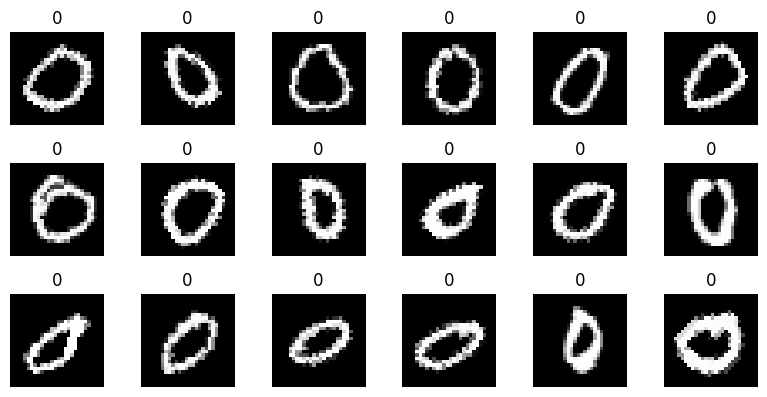

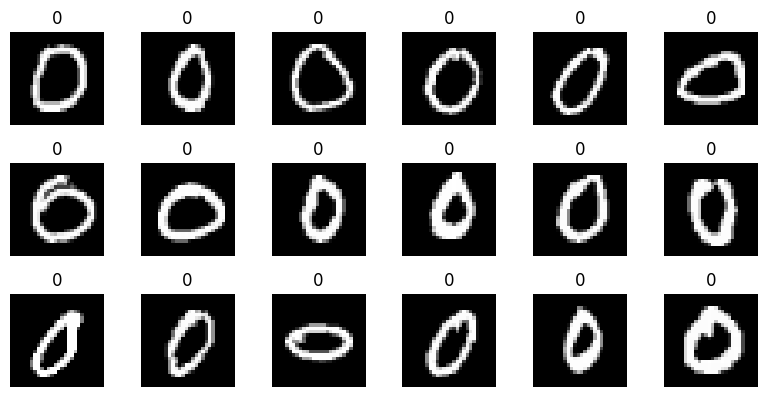

In [ ]:
def get_dataloaders(data_dir='mnist_png', batch_size=32):
    transform_without_augmentation = transforms.ToTensor()
    transform_with_augmentation = transforms.Compose([
        transforms.RandomRotation(45),
        transforms.ToTensor(),       # Converts to tensor and to the range of [0, 1]
    ])

    train_dataset = datasets.ImageFolder(root='mnist_png/training', transform=transform_with_augmentation)
    test_dataset_with_augmentation = datasets.ImageFolder(root='mnist_png/testing', transform=transform_with_augmentation)
    test_dataset_without_augmentation = datasets.ImageFolder(root='mnist_png/testing', transform=transform_without_augmentation)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader_with_augmentation = DataLoader(test_dataset_with_augmentation, batch_size=batch_size, shuffle=False)
    test_loader_without_augmentation = DataLoader(test_dataset_without_augmentation, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader_with_augmentation, test_loader_without_augmentation

def show_batch(dataloader):
    images, labels = next(iter(dataloader))
    grid_size = 6
    plt.figure(figsize=(8, 8))
    for i in range(len(images)):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title(f"{labels[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

download_and_extract_mnist_png()
train_loader, test_loader_with_augmentation, test_loader_without_augmentation = get_dataloaders(batch_size=18)
show_batch(test_loader_with_augmentation)
show_batch(test_loader_without_augmentation)


